In [1]:
# Jayson Francis

In [6]:
from sklearn import datasets
import matplotlib.pyplot as plt

import numpy as np

plt.rcParams['figure.figsize'] = (10, 5)

In [7]:
iris = datasets.load_iris()

# Assign petal length and petal width to X matrix (150 samples)
X = iris.data[:, [2, 3]]

# Class labels
y = iris.target

In [8]:
# Split the dataset into separate training and test datasets.
from sklearn.cross_validation import train_test_split

# Split the X and y arrays into 30 percent test data, and 70 (45 samples) percent training data (105 samples)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [9]:
# Optimization - Feature scaling
from sklearn.preprocessing import StandardScaler

# Initlalize a new StandardScaler object, sc
sc = StandardScaler()

# Using the fit method, estimate the sample mean and standard deviation for each feature demension. 
sc.fit(X_train)

# Transform both training and test sets using the sample mean and standard deviations
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [10]:
# Import the Perceptron implementation 
from sklearn.linear_model import Perceptron

# Initialize a new perceptron object, ppn.
ppn = Perceptron(n_iter=40, eta0=0.1, random_state=0)

# Train the model
ppn.fit(X_train_std, y_train)

Perceptron(alpha=0.0001, class_weight=None, eta0=0.1, fit_intercept=True,
      n_iter=40, n_jobs=1, penalty=None, random_state=0, shuffle=True,
      verbose=0, warm_start=False)

In [11]:
y_pred = ppn.predict(X_test_std)

print('Misclassified samples: %d /' % (y_test != y_pred).sum(), y_test.size)

Misclassified samples: 4 / 45


In [12]:
# Different performance metrics
from sklearn.metrics import accuracy_score

# Calculate the classification accuracy of the perceptron on the test
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))

Accuracy: 0.91


In [13]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):
    
    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), 
                          np.arange(x2_min, x2_max, resolution))
    
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    
    Z = Z.reshape(xx1.shape)
    
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    # plot all the samples
    for idx, c1 in enumerate(np.unique(y)):
        plt.scatter(x=X[y == c1, 0], y=X[y == c1, 1], alpha=0.8, c=cmap(idx), marker=markers[idx], label=c1)
        
    # highlight the test samples
    if test_idx:
        X_test, y_test = X[test_idx, :], y[test_idx]
        plt.scatter(X_test[:, 0], X_test[:, 1], c='', alpha=1.0, linewidths=1, marker='o', s=55, label='test set')
    

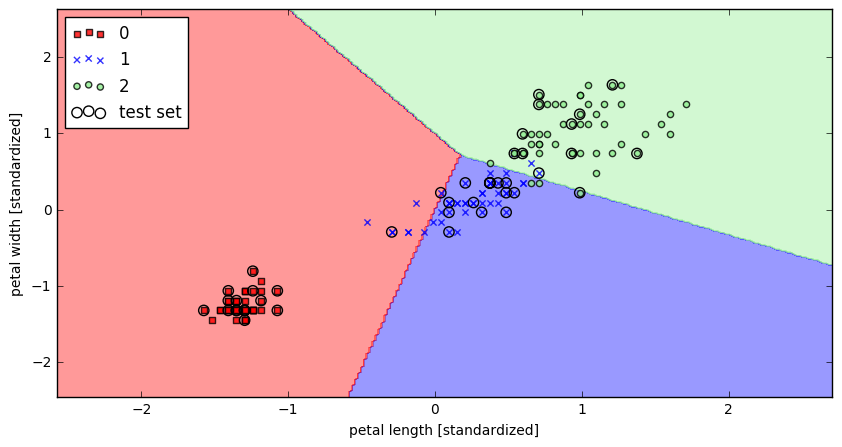

In [14]:
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

plot_decision_regions(X=X_combined_std, y=y_combined, classifier=ppn, test_idx=range(105,150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.show()

The perceptrons biggest disadvantage is that it never converges if the classes are not perfectly linearly seperable. Intuitively, we can think of the reason as the weights are continuously being updated since there is always at least one misclassified sample present in each epoch